In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df = df.iloc[: , 1:]

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [7]:

df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [8]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


<Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

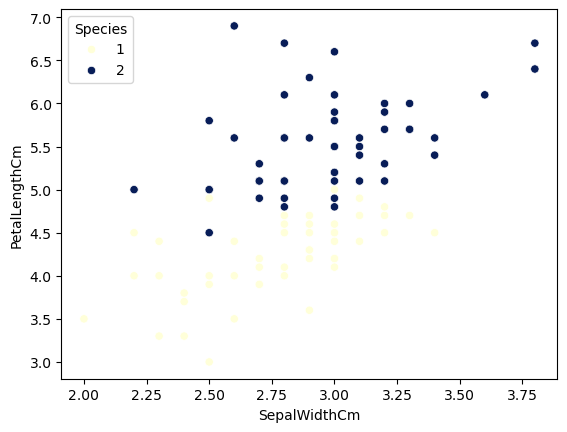

In [9]:
sns.scatterplot(x = 'SepalWidthCm' , y = 'PetalLengthCm' , data = df , hue = 'Species',palette= 'YlGnBu')

In [10]:
df_train = df.iloc[:60 , :].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
64,2.9,3.6,1
50,3.2,4.7,1
75,3.0,4.4,1
105,3.0,6.6,2
62,2.2,4.0,1
53,2.3,4.0,1
65,3.1,4.4,1
63,2.9,4.7,1
98,2.5,3.0,1
72,2.5,4.9,1


In [11]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [12]:
df_train

,SepalWidthCm,PetalLengthCm,Species
56,3.3,4.7,1
113,2.5,5.0,2
129,3.0,5.8,2
120,3.2,5.7,2
142,2.7,5.1,2
77,3.0,5.0,1
76,2.8,4.8,1
62,2.2,4.0,1
80,2.4,3.8,1
131,3.8,6.4,2


In [13]:
df_val

,SepalWidthCm,PetalLengthCm,Species
96,2.9,4.2,1
68,2.2,4.5,1
57,2.4,3.3,1
90,2.6,4.4,1
143,3.2,5.9,2


In [14]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[: , -1].values

In [15]:
y_test

array([1, 1, 1, 1, 2])

# Case 1 - Bagging

In [16]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
142,2.7,5.1,2
120,3.2,5.7,2
131,3.8,6.4,2
129,3.0,5.8,2
77,3.0,5.0,1
77,3.0,5.0,1
131,3.8,6.4,2
76,2.8,4.8,1


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))